In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [4]:
data=pd.read_excel("../dataset/clients.xls")

In [5]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
data.shape

(30000, 24)

In [8]:
data.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

<AxesSubplot:>

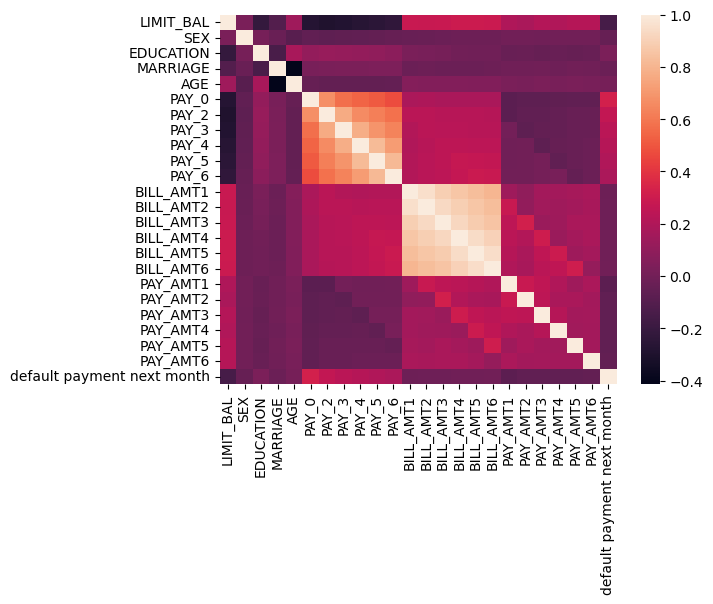

In [11]:
sns.heatmap(data.corr())

In [23]:
x=data.drop('default payment next month',axis=1)
y=data['default payment next month']

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)

In [27]:
train_scaler=StandardScaler()
test_scaler=StandardScaler()

In [28]:
scaled_train_data=train_scaler.fit_transform(x_train)
scaled_test_data=test_scaler.fit_transform(x_test)

In [29]:
scaled_train_df=pd.DataFrame(data=scaled_train_data, columns=x_train.columns, index=x_train.index)

In [30]:
scaled_test_df=pd.DataFrame(data=scaled_test_data, columns=x_test.columns, index=x_test.index)

In [31]:
scaled_train_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
16831,-0.365093,-1.238563,1.448725,-1.054777,1.464785,0.015441,-0.724837,-0.697423,-0.668007,-0.647249,...,-0.642576,-0.661257,-0.529514,-0.579208,-0.105018,-0.145558,-0.242409,0.201062,-0.014852,-0.233621
4222,-1.061279,-1.238563,-1.073197,0.861786,0.271955,1.794063,0.110028,0.141588,0.189890,0.238910,...,0.228168,0.224623,0.099678,0.583327,-0.095828,-0.039170,0.152840,-0.212528,2.237818,0.268573
8736,-0.597155,0.807387,0.187764,0.861786,0.380394,0.015441,0.110028,0.141588,0.189890,0.238910,...,-0.067356,-0.081444,-0.154738,-0.181984,-0.213650,-0.157335,-0.219417,-0.239691,-0.231210,-0.254511
27880,-0.287739,0.807387,1.448725,-1.054777,-1.029313,0.015441,0.110028,1.819611,1.905684,2.011229,...,1.169781,1.409281,1.438216,1.562072,0.316551,-0.133702,0.207584,-0.302252,0.074237,-0.012958
29290,-0.906571,-1.238563,1.448725,0.861786,-1.029313,1.794063,0.110028,0.141588,0.189890,0.238910,...,-0.068136,-0.166675,-0.389455,-0.369159,-0.210882,-0.010496,-0.213942,-0.228875,-0.268309,-0.257889


In [35]:
gnb=GaussianNB()
pred_y=gnb.fit(scaled_train_df,y_train).predict(scaled_test_df)

In [36]:
ac=accuracy_score(y_test, pred_y)
ac

0.6603030303030303

In [37]:
param_grid = {"var_smoothing": [1e-9,0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]}

grid = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5,  verbose=3)

In [38]:
grid.fit(scaled_train_data, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV 1/5] END ...............var_smoothing=1e-09;, score=0.580 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-09;, score=0.665 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-09;, score=0.714 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-09;, score=0.646 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-09;, score=0.689 total time=   0.0s
[CV 1/5] END .................var_smoothing=0.1;, score=0.665 total time=   0.0s
[CV 2/5] END .................var_smoothing=0.1;, score=0.743 total time=   0.0s
[CV 3/5] END .................var_smoothing=0.1;, score=0.769 total time=   0.0s
[CV 4/5] END .................var_smoothing=0.1;, score=0.740 total time=   0.0s
[CV 5/5] END .................var_smoothing=0.1;, score=0.754 total time=   0.0s
[CV 1/5] END ...............var_smoothing=0.001;, score=0.581 total time=   0.0s
[CV 2/5] END ...............var_smoothing=0.001;

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 0.1, 0.001, 0.5, 0.05, 0.01,
                                           1e-08, 1e-07, 1e-06, 1e-10, 1e-11]},
             verbose=3)

In [39]:
grid.best_estimator_

GaussianNB(var_smoothing=0.5)

In [40]:
gnb_new=GaussianNB(var_smoothing=0.5)
pred_y_new=gnb_new.fit(scaled_train_df,y_train).predict(scaled_test_df)

In [41]:
ac_new=accuracy_score(y_test,pred_y_new)
ac_new

0.7798989898989899

In [49]:
param_grid_xgboost = {"n_estimators": [50,100, 130], "max_depth": range(3, 11, 1),"random_state":[0,50,100]}


grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid_xgboost, verbose=3,cv=5,n_jobs=-1)

In [50]:
grid.fit(scaled_train_df,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [60]:
xgb_new=grid.best_estimator_

In [61]:
pred_y_xgb_new=xgb_new.fit(scaled_train_df,y_train).predict(scaled_test_df)

In [62]:
ac_xgb=accuracy_score(y_test,pred_y_xgb_new)

In [63]:
ac_xgb

0.821010101010101